<a href="https://colab.research.google.com/github/Kryptonite778/AST401-Kepler-Project/blob/main/AST401_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Fetch Kepler exoplanet data (mass, radius)
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,pl_bmasse,pl_rade+from+pscomppars+where+disc_facility+like+'Kepler'&format=csv"
df = pd.read_csv(url)

# Drop missing values
df = df.dropna(subset=['pl_bmasse', 'pl_rade'])

df.head()


,pl_name,pl_bmasse,pl_rade
0,Kepler-334 d,2.57,1.41
1,Kepler-251 d,8.10,2.77
2,Kepler-729 b,12.50,3.58
3,Kepler-687 b,12.20,3.52
4,Kepler-119 b,12.60,3.60


In [3]:
# Earth density = 5.51 g/cm^3
earth_density = 5.51
saturn_density = 0.69

# Density formula: density ∝ Mass / Radius^3
df['Density'] = df['pl_bmasse'] / (df['pl_rade']**3) * earth_density

df[['pl_name','pl_bmasse','pl_rade','Density']].head()


,pl_name,pl_bmasse,pl_rade,Density
0,Kepler-334 d,2.57,1.41,5.051582
1,Kepler-251 d,8.10,2.77,2.099894
2,Kepler-729 b,12.50,3.58,1.501110
3,Kepler-687 b,12.20,3.52,1.541287
4,Kepler-119 b,12.60,3.60,1.488040


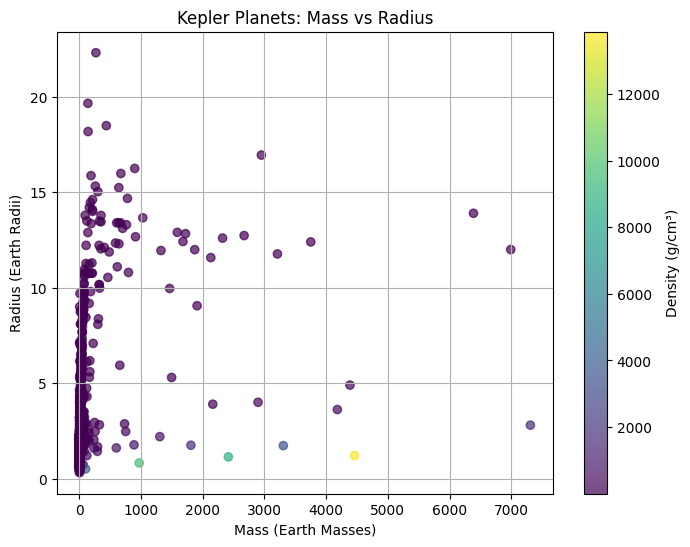

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(df['pl_bmasse'], df['pl_rade'], c=df['Density'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Density (g/cm³)")
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Radius (Earth Radii)")
plt.title("Kepler Planets: Mass vs Radius")
plt.grid(True)
plt.show()

In [5]:
# Planet 1: More dense than Earth
planet1 = df[df['Density'] > earth_density].iloc[0]

# Planet 2: Between Earth and Saturn in density
planet2 = df[(df['Density'] <= earth_density) & (df['Density'] >= saturn_density)].iloc[0]

# Planet 3: Less dense than Saturn
planet3 = df[df['Density'] < saturn_density].iloc[0]

print("Planet more dense than Earth:", planet1['pl_name'], "| Density:", round(planet1['Density'], 2), "g/cm³")
print("Planet between Earth & Saturn:", planet2['pl_name'], "| Density:", round(planet2['Density'], 2), "g/cm³")
print("Planet less dense than Saturn:", planet3['pl_name'], "| Density:", round(planet3['Density'], 2), "g/cm³")


Planet more dense than Earth: Kepler-92 b | Density: 8.19 g/cm³
Planet between Earth & Saturn: Kepler-334 d | Density: 5.05 g/cm³
Planet less dense than Saturn: Kepler-51 d | Density: 0.05 g/cm³
